# Oblig A: Statistiske beregninger

## Teori
### Statistikk
Gjennomsnittet $\bar{x}$ til $N$ verdier $x_i$ er gitt ved:

$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

Et mål på avvik fra gjennomsnittet er _standardavviket_. Dette er gitt som rota av variansen:

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x})^2}$$

### Regresjon
Regresjon er en måte å tilpasse en funksjon til diskrete data på. Vi bruker en regresjonsmodul i Python (*polyfit*) som er basert på *minste kvadraters metode*. Dette er en metode som tilpasser en kurve til datapunktene slik at variansen (avviket fra gjennomsnittet) blir så liten som mulig.


### Standardkurver
En standardkurve i spektrofotometri er en lineær funksjon som er tilpasset absorpsjonsdataene til et sett med løsninger med kjent konsentrasjon. Kurven bør følge Beers lov, altså at konsentrasjonen skal være proporsjonal med absorbansen ($c \propto A). Funksjonen bør altså være lineær og gå igjennom origo. Det er ikke alltid vi får en kurve gjennom origo, og da kan vi eventuelt sløyfe konstantleddet. Merk derimot at du da endrer på modellen, og variansen er ikke lenger så liten som mulig.

## Oppgaver
### A.1
a)

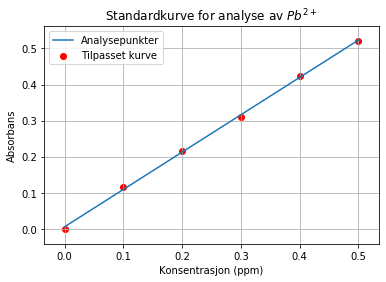

In [7]:
import numpy as np
import matplotlib.pyplot as plt

bly = [0,0.1,0.2,0.3,0.4,0.5]
absorbans = [0,0.116,0.216,0.310,0.425,0.520]
ukjent = 0.340

a,b = np.polyfit(bly, absorbans, 1)
x = np.linspace(0,0.5,1000)
y1 = a*x + b

plt.scatter(bly,absorbans,color='red')
plt.plot(x,y1)
plt.title('Standardkurve for analyse av $Pb^{2+}$')
plt.xlabel('Konsentrasjon (ppm)')
plt.ylabel('Absorbans')
plt.legend(["Analysepunkter", "Tilpasset kurve"])
plt.grid()
plt.show()

b)

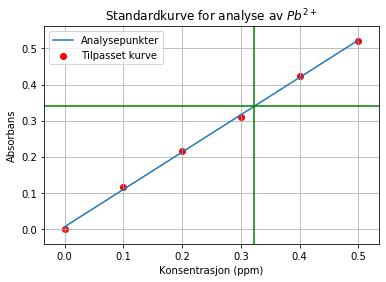

Konsentrasjonen av bly i bekkevannet var 0.323 ppm


In [12]:
kons=(ukjent-b)/a

plt.scatter(bly,absorbans,color='red')
plt.plot(x,y1)
plt.title('Standardkurve for analyse av $Pb^{2+}$')
plt.xlabel('Konsentrasjon (ppm)')
plt.ylabel('Absorbans')
plt.legend(["Analysepunkter", "Tilpasset kurve"])
plt.grid()
plt.axhline(y=ukjent,color='green')
plt.axvline(x=kons, color = 'green')
plt.show()

print(f'Konsentrasjonen av bly i bekkevannet var {kons:.3f} ppm')

### A.2
a)

In [18]:
import numpy as np

def gjennomsnitt(x):
    snitt = 0
    for i in range(len(x)):
        snitt += x[i]
    snitt = snitt/len(x)
    return snitt

def standardavvik(x,snitt):
    avvik = 0
    for i in range(len(x)):
        avvik += (x[i] - snitt)**2
    avvik = (avvik/len(x))**(1/2)
    return avvik

liste = [1,2,2,1,3,3]
snitt = gjennomsnitt(liste)
snitt_numpy = np.mean(liste)
avvik = standardavvik(liste,snitt)
avvik_numpy = np.std(liste)

print(f'Snitt egen funksjon: {snitt}, snitt numpy-funksjon: {snitt_numpy}')
print(f'Standardavvik egen funksjon: {avvik}, standardavvik numpy-funksjon: {avvik_numpy}')

Snitt egen funksjon: 2.0, snitt numpy-funksjon: 2.0
Standardavvik egen funksjon: 0.816496580927726, standardavvik numpy-funksjon: 0.816496580927726


b)

In [26]:
konsentrasjon = [245, 272, 252, 264, 261, 272, 255, 260, 268, 259] # mg/mL
snitt_kromatografi = gjennomsnitt(konsentrasjon)
avvik_kromatografi = standardavvik(konsentrasjon,snitt_kromatografi)
print(f'Snittet er {snitt_kromatografi:3.0f} mg/mL og standardavviket er {avvik_kromatografi:.0f} mg/mL')

Snittet er 261 mg/mL og standardavviket er 8 mg/mL


c)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Leser og sorterer fildata
sept = np.loadtxt('Datafiler\sept.txt',skiprows=1,dtype=str)
dec = np.loadtxt('Datafiler\dec.txt',skiprows=1,dtype=str)

dates_sept = sept[:,0]
conc_sept = sept[:,2]
dates_dec = dec[:,0]
conc_dec = dec[:,2]

# Funksjoner for sortering, gjennomsnitt og standardavvik
def sort_year(list_dates, list_conc):
    list_year1 = []; list_year2 = []; list_year3 = []
    for i in range(len(list_dates)):
        if list_dates[i].startswith('2002'):
            list_year1.append(float(list_conc[i]))
        elif list_dates[i].startswith('2003'):
            list_year2.append(float(list_conc[i]))
        elif list_dates[i].startswith('2004'):
            list_year3.append(float(list_conc[i]))
    return list_year1, list_year2, list_year3

def gjennomsnitt(liste1,liste2,liste3):
    snitt = []
    for i in range(len(liste1)):
        verdi = (1/3)*(liste1[i] + liste2[i] + liste3[i])
        snitt.append(verdi)
    return snitt

def standardavvik(liste1,liste2,liste3,snitt):
    avvik = []
    for i in range(len(liste1)):
        verdi = np.sqrt((1/3)*((liste1[i] - snitt[i])**2 + (liste2[i] - snitt[i])**2 + (liste3[i] - snitt[i])**2))
        avvik.append(verdi)
    return avvik

# Kaller funksjoner
conc_sept_2002, conc_sept_2003, conc_sept_2004 = sort_year(dates_sept, conc_sept)
conc_dec_2002, conc_dec_2003, conc_dec_2004 = sort_year(dates_dec, conc_dec)

snitt_sept = gjennomsnitt(conc_sept_2002, conc_sept_2003, conc_sept_2004)
snitt_dec = gjennomsnitt(conc_dec_2002, conc_dec_2003, conc_dec_2004)
std_sept = standardavvik(conc_sept_2002, conc_sept_2003, conc_sept_2004, snitt_sept)
std_dec = standardavvik(conc_dec_2002, conc_dec_2003, conc_dec_2004, snitt_dec)

d)

Vi kunne ikke bruke funksjonene vi lagde fordi de regner gjennomsnitt og standardavvik av en liste, mens her skal vi regne snittet av tre verdier i hver sin liste for hver rad i listene.